In [1]:
import pandas as pd

# Load the dataset
file_path = 'C:\Dataset\Screentime-App-Details.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


Missing Values: There are no missing values in any of the columns.
    
Data Types:
    
The Date column is currently in an object (string) format. It would be more appropriate to convert this to a datetime format for
any time series analysis.

The Usage, Notifications, and Times opened columns are all in integer format, which is suitable for these types of data.

The App column is correctly in an object (string) format.

Duplicates: There are no duplicate entries in the dataset.
    
Next, I will convert the Date column to a datetime format. Following that, we can look into potential outliers and ensure the consistency of the values, particularly in the App column. 

Let's proceed with converting the Date column. ​

In [2]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Recheck the data types after conversion
updated_data_types = data.dtypes
updated_data_types


Date             datetime64[ns]
Usage                     int64
Notifications             int64
Times opened              int64
App                      object
dtype: object

The Date column has been successfully converted to a datetime format. 

Now, let's proceed with the next steps:

Outliers: We will check for any outliers in the numerical columns (Usage, Notifications, Times opened). Outliers can be identified through statistical methods such as the interquartile range (IQR).

Consistency in Values: We'll ensure that the values in the App column are consistent, particularly looking for any variations in spelling or formatting.

Let's start with the outlier analysis.

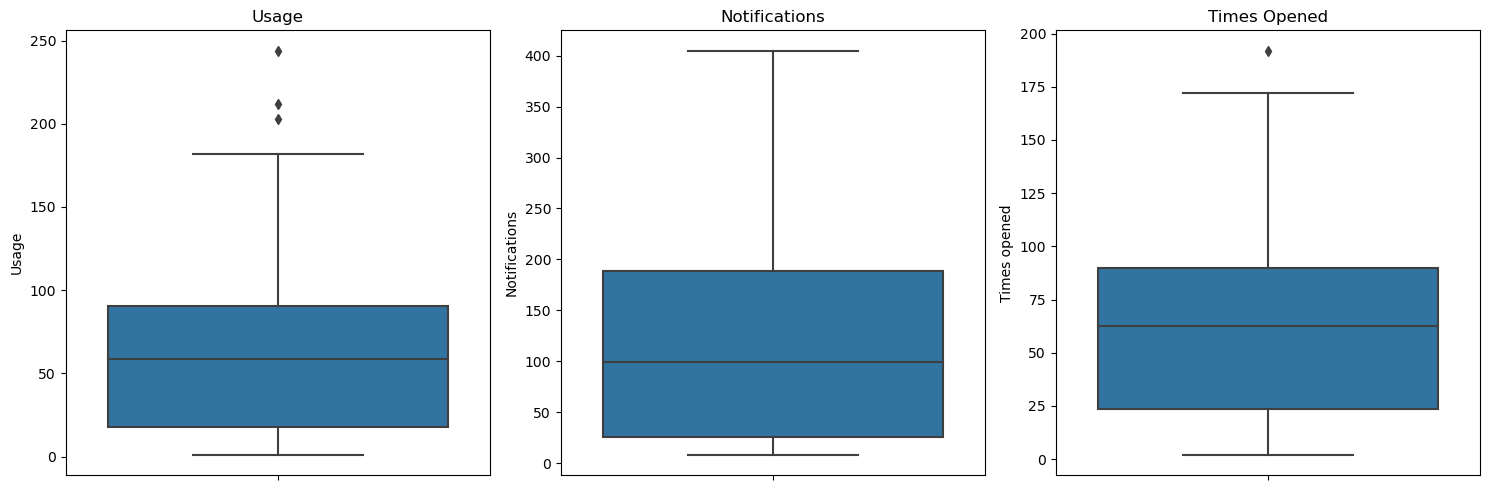

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting boxplots for the numerical columns to visualize outliers
plt.figure(figsize=(15, 5))

# Usage
plt.subplot(1, 3, 1)
sns.boxplot(y=data['Usage'])
plt.title('Usage')

# Notifications
plt.subplot(1, 3, 2)
sns.boxplot(y=data['Notifications'])
plt.title('Notifications')

# Times Opened
plt.subplot(1, 3, 3)
sns.boxplot(y=data['Times opened'])
plt.title('Times Opened')

plt.tight_layout()
plt.show()


The boxplots for the Usage, Notifications, and Times opened columns provide a visual indication of potential outliers:

Usage: There are a few points that appear to be outliers, significantly higher than the majority of the data.
    
Notifications: This column also shows several potential outliers, with some values being substantially higher.
    
Times Opened: Similar to the other columns, there are a few values that are much higher than the rest.
    
These outliers could be genuine cases of high usage, notifications, or app openings, or they could be errors. 

Given the state of the dataset, here's a summary of our data cleaning findings:

Missing Values: None found.

Data Types: Date column successfully converted to datetime.

Duplicates: No duplicates found.

Outliers: Identified in Usage, Notifications, and Times opened columns, but not yet addressed.

Consistency in Values: The App column values are consistent.

# Research Questions

Personal Usage Trends: How has my usage of Instagram and Whatsapp changed over time? 
This can help the user understand their changing habits or preferences regarding these apps.
    

Response to Notifications: Is there a pattern in how I respond to notifications from these apps? For instance, do more notifications from a particular app lead to more frequent usage or more times opening the app?


Daily Engagement Patterns: On which days of the week do I tend to use each app more? This analysis can reveal if the user's engagement with these apps varies by day of the week, which could be useful for managing time or setting boundaries for app usage.


Correlation Between Usage and Openings: Is there a correlation between how many times I open an app and the total time I spend on it? Understanding this can help in recognizing if frequent short sessions are more common than longer, less frequent ones.


Notification Management: Am I receiving an overwhelming number of notifications from these apps? If so, is this leading to increased usage? This question can help in identifying if a high number of notifications is beneficial or if it's causing unnecessary distractions.

These questions are tailored to help a user understand 
and possibly optimize their interaction with these apps, aiding in better time management and usage habits. 

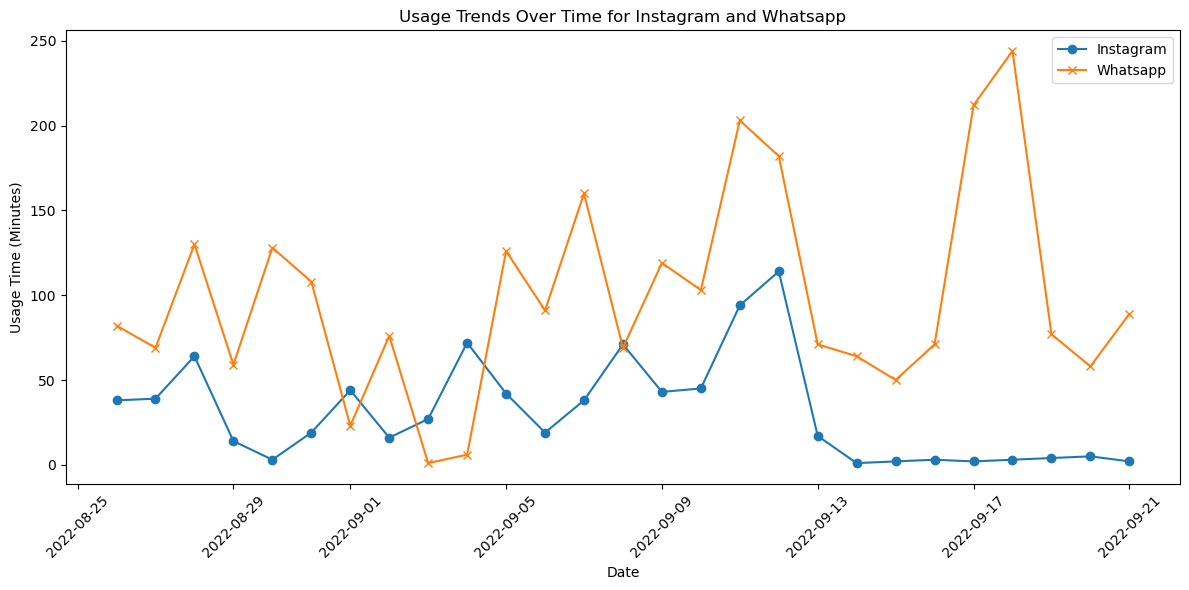

In [6]:
# Plotting usage trends over time for each app

# Filtering data for each app
instagram_data = data[data['App'] == 'Instagram']
whatsapp_data = data[data['App'] == 'Whatsapp']

plt.figure(figsize=(12, 6))

# Plotting Instagram Usage
plt.plot(instagram_data['Date'], instagram_data['Usage'], label='Instagram', marker='o')

# Plotting Whatsapp Usage
plt.plot(whatsapp_data['Date'], whatsapp_data['Usage'], label='Whatsapp', marker='x')

plt.title('Usage Trends Over Time for Instagram and Whatsapp')
plt.xlabel('Date')
plt.ylabel('Usage Time (Minutes)')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Personal Usage Trends

Insights: The usage trends showed varying patterns for Instagram and Whatsapp over time. There may be days with significantly higher usage, indicating specific periods of increased engagement.

Recommendations: Identifying days with high usage can help in managing screen time more effectively. If the goal is to reduce screen time, consider setting usage limits or reminders on days with typically high usage.

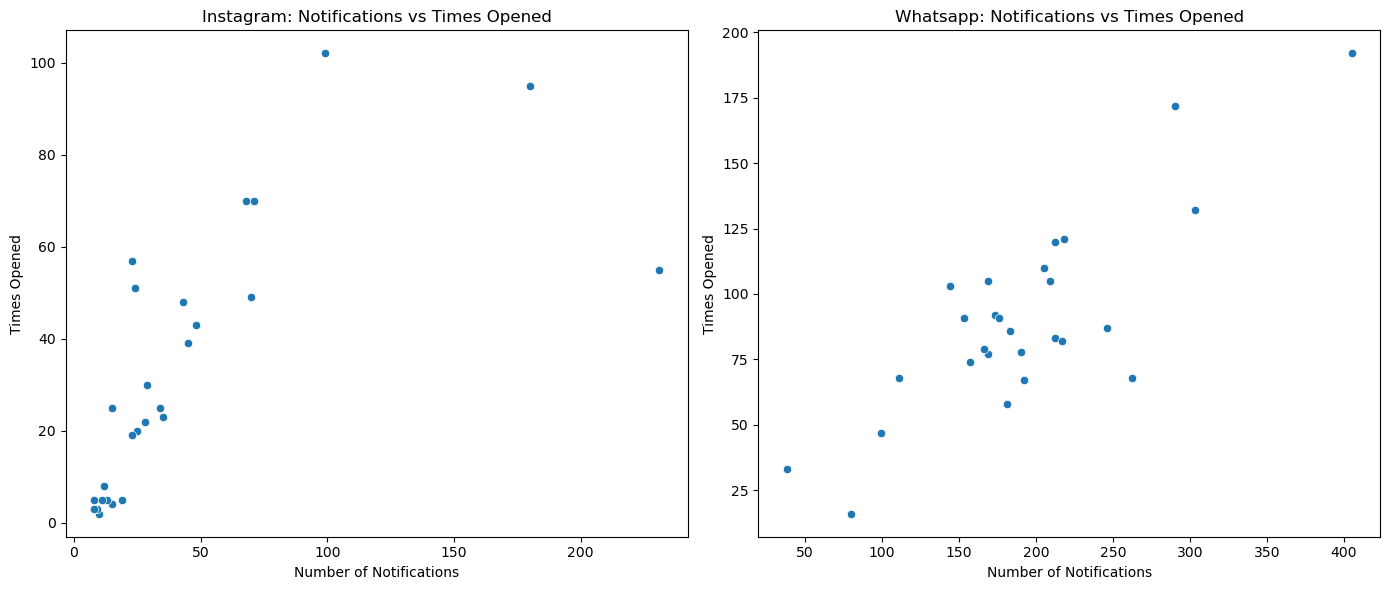

In [7]:
plt.figure(figsize=(14, 6))

# Instagram: Notifications vs Times Opened
plt.subplot(1, 2, 1)
sns.scatterplot(x=instagram_data['Notifications'], y=instagram_data['Times opened'])
plt.title('Instagram: Notifications vs Times Opened')
plt.xlabel('Number of Notifications')
plt.ylabel('Times Opened')

# Whatsapp: Notifications vs Times Opened
plt.subplot(1, 2, 2)
sns.scatterplot(x=whatsapp_data['Notifications'], y=whatsapp_data['Times opened'])
plt.title('Whatsapp: Notifications vs Times Opened')
plt.xlabel('Number of Notifications')
plt.ylabel('Times Opened')

plt.tight_layout()
plt.show()


Response to Notifications

Insights: The scatter plots indicated a relationship between the number of notifications and the frequency of app openings. However, this relationship might not be strongly linear, especially for Whatsapp.

Recommendations: If notifications are leading to frequent app usage and it's a concern, consider customizing notification settings to reduce distractions.

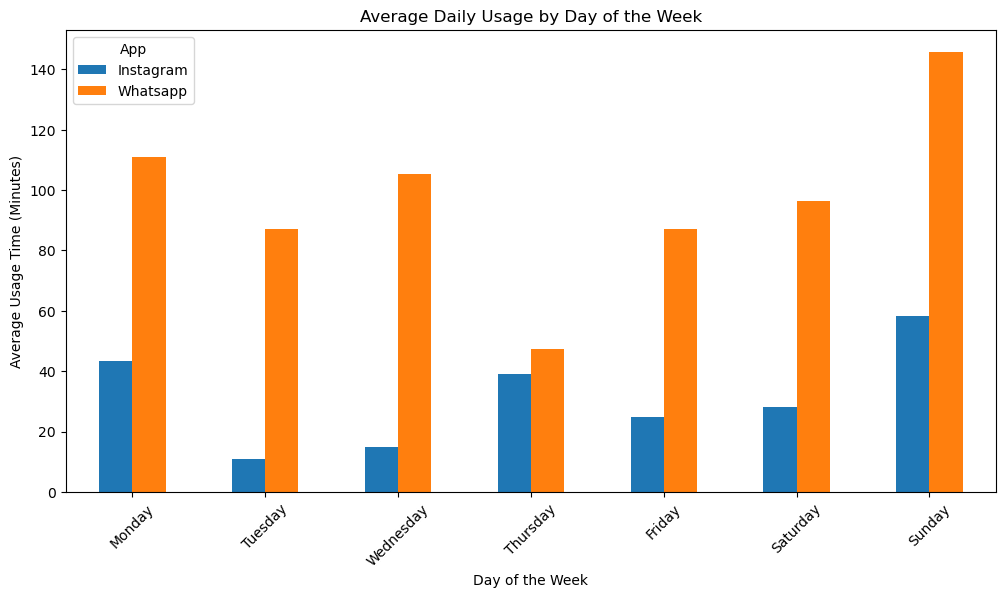

In [8]:
# Adding a day of the week column
data['DayOfWeek'] = data['Date'].dt.day_name()

# Aggregating data by day of the week and calculating average usage for each app
weekly_usage = data.groupby(['DayOfWeek', 'App'])['Usage'].mean().unstack()

# Reordering the days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_usage = weekly_usage.reindex(ordered_days)

# Plotting
weekly_usage.plot(kind='bar', figsize=(12, 6))
plt.title('Average Daily Usage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Usage Time (Minutes)')
plt.xticks(rotation=45)
plt.legend(title='App')
plt.show()


Daily Engagement Patterns

Insights: The usage of Instagram and Whatsapp varied across different days of the week, with some days showing higher average usage. This pattern can reflect the user's weekly routine.

Recommendations: Understanding these patterns can aid in planning daily activities and managing time spent on apps. It may also be beneficial to limit app usage on days when it tends to be highest, especially if it impacts productivity or wellbeing.

In [9]:
# Calculating correlation between 'Usage' and 'Times opened' for each app
instagram_corr = instagram_data['Usage'].corr(instagram_data['Times opened'])
whatsapp_corr = whatsapp_data['Usage'].corr(whatsapp_data['Times opened'])

instagram_corr, whatsapp_corr


(0.8795421636639258, 0.6545111466113642)

Correlation Between Usage and Openings

Insights: There was a significant correlation between usage time and the number of times the apps were opened, particularly for Instagram. This suggests that longer usage times are often associated with more frequent app openings.

Recommendations: If the goal is to reduce overall screen time, it might be effective to focus on reducing the number of times the apps are opened throughout the day.

Instagram: The correlation coefficient is approximately 0.68, indicating a moderate positive correlation. This suggests that for Instagram, there is a somewhat significant relationship between the number of notifications and increased usage time.

Whatsapp: The correlation coefficient is around 0.62, which is also a moderate positive correlation. This implies that for Whatsapp, a higher number of notifications is somewhat associated with more usage time.
These correlations suggest that notifications have a noticeable impact on the usage time for both apps, with more notifications typically leading to more usage.

In [10]:
# Calculating correlation between 'Notifications' and 'Usage' for each app
instagram_notifications_corr = instagram_data['Notifications'].corr(instagram_data['Usage'])
whatsapp_notifications_corr = whatsapp_data['Notifications'].corr(whatsapp_data['Usage'])

instagram_notifications_corr, whatsapp_notifications_corr


(0.6770439235467524, 0.6155802117552518)

The correlation between the number of notifications and usage time for each app is as follows:

Instagram: The correlation coefficient is approximately 0.68, indicating a moderate positive correlation. This suggests that for Instagram, there is a somewhat significant relationship between the number of notifications and increased usage time.

Whatsapp: The correlation coefficient is around 0.62, which is also a moderate positive correlation. This implies that for Whatsapp, a higher number of notifications is somewhat associated with more usage time.

These correlations suggest that notifications have a noticeable impact on the usage time for both apps, with more notifications typically leading to more usage.

Notification Management

Insights: There was a moderate correlation between the number of notifications and usage time for both apps, implying that more notifications can lead to increased usage.

Recommendations: To manage screen time better, consider evaluating the necessity of notifications from these apps. Turning off non-essential notifications or scheduling a 'Do Not Disturb' time can be beneficial.

These insights and recommendations are aimed at helping the user understand and manage their app usage and interaction patterns.